In [1]:
!pip install citipy==0.0.5


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
from citipy import citipy
import config
from config import w_api
from random import uniform
import numpy as np
import pandas as pd
import requests
import random
import json
from pprint import pprint
import matplotlib.pyplot as plt 
from scipy.stats import linregress


In [4]:
metric = "Fahrenheit"

city_url = 'https://pypi.python.org/pypi/citipy'
url = 'http://api.openweathermap.org/data/2.5/weather?'
print(requests.get(city_url))
print(requests.get(url))


<Response [200]>
<Response [401]>


In [5]:
response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

JSONDecodeError: Expecting value: line 7 column 1 (char 6)

In [6]:
#Run city search 
cities = list()
weather = list()
dup_cities = list()
weatherless_cities = set()
while len(weather) < 500:
    
    long = round(uniform(-30,30), 3) #longitude ranges from -30 to 30
    lat = round(uniform(-90, 90), 3) #latitude ranges from -90 to 90
 #feed into citipy the lat, long coordinates to return as city object    
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code

    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.append(city_entry)
        print(f"city: {city_entry}")
        #establishing a base URL
        #url = used above to test connection
         #api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=ed8107ba19974709385b0b4cb54184ff - example of what the call should look like..
        city_request = url + f"{city}"
        query_url = url + "APPID=" + w_api  + "&q=" + city_entry + "?" + "&units=metric"
        print(f"Request for {city_request}")
       
        
        response = requests.get(query_url)
        weather_json = response.json()
        print("weather data: \n")
        pprint(weather_json)
        if weather_json['cod'] == 200:
            weather.append(weather_json)
        elif weather_json['cod'] == 404:
            weatherless_cities.append(city_entry)
        else:
            pass
    else:
        print(f"duplicate city: {city_entry}")
        dup_cities.append(city_entry)
        


city: husavik,is
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x069EDEC8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 66.04, 'lon': -17.34},
 'dt': 1603310054,
 'id': 2629833,
 'main': {'feels_like': -3.98,
          'humidity': 92,
          'pressure': 1006,
          'temp': -1,
          'temp_max': -1,
          'temp_min': -1},
 'name': 'Husavik',
 'sys': {'country': 'IS',
         'id': 83,
         'sunrise': 1603268823,
         'sunset': 1603300828,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1}}
city: ushuaia,ar
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05BDE298>
weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.8,

 'id': 633221,
 'main': {'feels_like': 7.94,
          'humidity': 93,
          'pressure': 1003,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Uusikaupunki',
 'sys': {'country': 'FI',
         'id': 1364,
         'sunrise': 1603258293,
         'sunset': 1603292760,
         'type': 1},
 'timezone': 10800,
 'visibility': 4600,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 170, 'speed': 2.6}}
city: kruisfontein,za
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B427A8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34, 'lon': 24.73},
 'dt': 1603310057,
 'id': 986717,
 'main': {'feels_like': 13.55,
          'humidity': 76,
          'pressure': 1021,
          'temp': 13.89,
          'temp_max': 13.89,
          'temp_min': 13.89},
 'name': 'Kruisfontein',
 'sys': {'country': 'ZA',
         'id': 2035063,

weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.48, 'lon': -16.55},
 'dt': 1603310059,
 'id': 2246901,
 'main': {'feels_like': 34.86,
          'humidity': 74,
          'pressure': 1011,
          'temp': 30,
          'temp_max': 30,
          'temp_min': 30},
 'name': 'Oussouye',
 'sys': {'country': 'SN',
         'id': 2413,
         'sunrise': 1603263413,
         'sunset': 1603305859,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 2.1}}
duplicate city: cape town,za
duplicate city: georgetown,sh
city: sao jose da coroa grande,br
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05CEDE20>
weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -8.9, 'lon': -35.15},
 'dt': 1603310059,
 'id':

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.72, 'lon': 10.58},
 'dt': 1603310062,
 'id': 2613939,
 'main': {'feels_like': 7.18,
          'humidity': 94,
          'pressure': 996,
          'temp': 12.37,
          'temp_max': 12.78,
          'temp_min': 11.67},
 'name': 'Skagen',
 'rain': {'1h': 0.69},
 'sys': {'country': 'DK',
         'id': 2002524,
         'sunrise': 1603260366,
         'sunset': 1603295885,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 151, 'gust': 10.28, 'speed': 8.05}}
duplicate city: jamestown,sh
duplicate city: port-gentil,ga
city: ulfborg,dk
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x066E1268>
weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 56.27, 'lon':

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 44.97, 'lon': 3.72},
 'dt': 1603310064,
 'id': 2985020,
 'main': {'feels_like': 5.17,
          'grnd_level': 884,
          'humidity': 83,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 10.46,
          'temp_max': 10.46,
          'temp_min': 10.46},
 'name': 'Conil',
 'sys': {'country': 'FR', 'sunrise': 1603260530, 'sunset': 1603299014},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 171, 'speed': 6.79}}
duplicate city: ushuaia,ar
duplicate city: bredasdorp,za
city: otavi,na
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C58A00>
weather data: 

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -19.65, 'lon': 17.33},
 'dt': 1603310064,
 'id': 335393

weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 67.67, 'lon': 12.69},
 'dt': 1603310067,
 'id': 3137469,
 'main': {'feels_like': -1.7,
          'humidity': 59,
          'pressure': 1004,
          'temp': 3,
          'temp_max': 3,
          'temp_min': 3},
 'name': 'Sørland',
 'sys': {'country': 'NO',
         'id': 1642,
         'sunrise': 1603262094,
         'sunset': 1603293145,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 3.1}}
duplicate city: barentsburg,sj
duplicate city: jamestown,sh
duplicate city: hermanus,za
duplicate city: arraial do cabo,br
city: taoudenni,ml
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06BAD358>
weather data: 

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat'

weather data: 

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -1.62, 'lon': 11.61},
 'dt': 1603310069,
 'id': 2398430,
 'main': {'feels_like': 24.07,
          'grnd_level': 952,
          'humidity': 93,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 21.12,
          'temp_max': 21.12,
          'temp_min': 21.12},
 'name': 'Mimongo',
 'rain': {'1h': 0.73},
 'sys': {'country': 'GA', 'sunrise': 1603256001, 'sunset': 1603299756},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 243, 'speed': 1.03}}
city: lagoa,pt
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06E5DAD8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.05, 'lon': -27.98},
 'dt': 1603310070,
 'id': 3372964,
 'main': {'feels_like': 11.44,
     

weather data: 

{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 8.46, 'lon': 25.68},
 'dt': 1603310072,
 'id': 368246,
 'main': {'feels_like': 25.69,
          'grnd_level': 950,
          'humidity': 88,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 22.56,
          'temp_max': 22.56,
          'temp_min': 22.56},
 'name': 'Raja',
 'rain': {'1h': 0.11},
 'sys': {'country': 'SS', 'sunrise': 1603253088, 'sunset': 1603295916},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 246, 'speed': 1.13}}
duplicate city: hermanus,za
duplicate city: jamestown,sh
city: aflu,dz
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x066E6D00>
weather data: 

{'cod': '404', 'message': 'city not found'}
city: east london,za
Request for http://api.openweathermap.org/data/2.5/w

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 20.5, 'lon': -10.07},
 'dt': 1603310075,
 'id': 2381972,
 'main': {'feels_like': 28.2,
          'grnd_level': 970,
          'humidity': 15,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 31.94,
          'temp_max': 31.94,
          'temp_min': 31.94},
 'name': 'Adrar',
 'sys': {'country': 'MR', 'sunrise': 1603262252, 'sunset': 1603303910},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 44, 'speed': 2.97}}
duplicate city: georgetown,sh
city: mao,td
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x071050A0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 39.89, 'lon': 4.27},
 'dt': 1603309855,
 'id': 2514301,
 'main': {'feels_like': 19.44,


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.33, 'lon': -40.29},
 'dt': 1603309826,
 'id': 3445026,
 'main': {'feels_like': 28.18,
          'humidity': 83,
          'pressure': 1016,
          'temp': 25.69,
          'temp_max': 26.67,
          'temp_min': 25},
 'name': 'Vila Velha',
 'sys': {'country': 'BR',
         'id': 8474,
         'sunrise': 1603267535,
         'sunset': 1603313132,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'speed': 3.6}}
duplicate city: dingle,ie
duplicate city: sorland,no
city: marsa matruh,eg
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06700A18>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.35, 'lon': 27.25},
 'dt': 1603310078,
 'id': 352733,
 'main': {'fe

weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -28.41, 'lon': 26.7},
 'dt': 1603310080,
 'id': 949282,
 'main': {'feels_like': 11.66,
          'grnd_level': 868,
          'humidity': 65,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 18.28,
          'temp_max': 18.28,
          'temp_min': 18.28},
 'name': 'Theunissen',
 'sys': {'country': 'ZA', 'sunrise': 1603251000, 'sunset': 1603297515},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 53, 'speed': 10.16}}
duplicate city: illoqqortoormiut,gl
duplicate city: bredasdorp,za
duplicate city: hermanus,za
duplicate city: bredasdorp,za
city: warqla,dz
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x066EA040>
weather data: 

{'cod': '404', 'message': 'city not found'}
city: kaniama,cd

weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1603310082,
 'id': 2446796,
 'main': {'feels_like': 23.85,
          'grnd_level': 973,
          'humidity': 14,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 27.8,
          'temp_max': 27.8,
          'temp_min': 27.8},
 'name': 'Bilma',
 'sys': {'country': 'NE', 'sunrise': 1603256641, 'sunset': 1603298487},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 71, 'speed': 2.38}}
duplicate city: ushuaia,ar
city: hofn,is
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x069EDE80>
weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.25, 'lon': -15.21},
 'dt': 1603310083,
 'id': 2630299,
 'main': {'feels_like': -3.5,
         

 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 47.03, 'lon': 20.97},
 'dt': 1603310085,
 'id': 721404,
 'main': {'feels_like': 7.99,
          'humidity': 76,
          'pressure': 1020,
          'temp': 10.32,
          'temp_max': 11,
          'temp_min': 10},
 'name': 'Dévaványa',
 'sys': {'country': 'HU',
         'id': 6676,
         'sunrise': 1603256575,
         'sunset': 1603294690,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 2.1}}
duplicate city: hermanus,za
duplicate city: adrar,dz
city: oranjemund,na
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C58928>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.55, 'lon': 16.43},
 'dt': 1603310085,
 'id': 3354071,
 'main': {'feels_like': 13,
          'grn

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -17.71, 'lon': -39.25},
 'dt': 1603310087,
 'id': 3466980,
 'main': {'feels_like': 26.4,
          'grnd_level': 1014,
          'humidity': 75,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 25.02,
          'temp_max': 25.02,
          'temp_min': 25.02},
 'name': 'Caravelas',
 'rain': {'1h': 1.332},
 'sys': {'country': 'BR', 'sunrise': 1603267424, 'sunset': 1603312743},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 53, 'speed': 3.49}}
duplicate city: ushuaia,ar
duplicate city: bredasdorp,za
city: miranda de ebro,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x0671D238>
weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 42.69, 'lon': -2

weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1603310090,
 'id': 779622,
 'main': {'feels_like': -5.96,
          'humidity': 80,
          'pressure': 1012,
          'temp': 1,
          'temp_max': 1,
          'temp_min': 1},
 'name': 'Havøysund',
 'sys': {'country': 'NO',
         'id': 1638,
         'sunrise': 1603260512,
         'sunset': 1603288981,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 6.7}}
duplicate city: barentsburg,sj
city: oudtshoorn,za
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B42F88>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.59, 'lon': 22.2},
 'dt': 1603310090,
 'id': 967106,
 'main': {'feels_like': 13.85,


weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 66.5, 'lon': 25.72},
 'dt': 1603310092,
 'id': 638936,
 'main': {'feels_like': -8.73,
          'humidity': 92,
          'pressure': 1009,
          'temp': -3,
          'temp_max': -3,
          'temp_min': -3},
 'name': 'Rovaniemi',
 'rain': {'1h': 0.12},
 'snow': {'1h': 0.115},
 'sys': {'country': 'FI',
         'id': 1354,
         'sunrise': 1603258596,
         'sunset': 1603290388,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 80, 'speed': 4.6}}
duplicate city: barentsburg,sj
duplicate city: hermanus,za
city: ostroh,ua
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City obje

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 46.25, 'lon': 6.5},
 'dt': 1603310095,
 'id': 2972741,
 'main': {'feels_like': 11,
          'humidity': 76,
          'pressure': 1016,
          'temp': 11.84,
          'temp_max': 12.78,
          'temp_min': 11.11},
 'name': 'Arrondissement de Thonon-les-Bains',
 'sys': {'country': 'FR',
         'id': 2036162,
         'sunrise': 1603259978,
         'sunset': 1603298232,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 176, 'gust': 1.79, 'speed': 0.45}}
duplicate city: hermanus,za
city: hammerfest,no
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C92538>
weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 70.66, 'lon': 23.68},
 'dt': 1603310095,
 'id': 7796

weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 63.1, 'lon': 21.62},
 'dt': 1603310097,
 'id': 632978,
 'main': {'feels_like': -0.03,
          'humidity': 93,
          'pressure': 1001,
          'temp': 4,
          'temp_max': 4,
          'temp_min': 4},
 'name': 'Vaasa',
 'sys': {'country': 'FI',
         'id': 1367,
         'sunrise': 1603258715,
         'sunset': 1603292238,
         'type': 1},
 'timezone': 10800,
 'visibility': 7000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 3.6}}
duplicate city: hermanus,za
city: mwense,zm
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B4F5F8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -10.38, 'lon': 28.7},
 'dt': 1603310098,
 'id': 902721,
 'main': {'feels_like': 25.53,
        

weather data: 

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 47.28, 'lon': -2.2},
 'dt': 1603310100,
 'id': 2977921,
 'main': {'feels_like': 11.94,
          'humidity': 100,
          'pressure': 1007,
          'temp': 12.6,
          'temp_max': 13,
          'temp_min': 12.22},
 'name': 'Saint-Nazaire',
 'sys': {'country': 'FR',
         'id': 6583,
         'sunrise': 1603262165,
         'sunset': 1603300220,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.1}}
duplicate city: kruisfontein,za
city: monrovia,lr
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B7B088>
weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 6.3, 'lon': -10.8},
 'dt': 1603310100,
 'id': 2274895,
 'main': {'feels

weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: barentsburg,sj
city: braslav,by
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D0CFD0>
weather data: 

{'cod': '404', 'message': 'city not found'}
city: sorvag,fo
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x0673C358>
weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: jamestown,sh
duplicate city: ushuaia,ar
city: tarudant,ma
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B95CE8>
weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: hermanus,za
duplicate city: hermanus,za
city: agropoli,it
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x069F1718>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.35, 'lon': 15},
 'dt': 1603310105,
 'id': 6541176,

weather data: 

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -11.55, 'lon': 20.78},
 'dt': 1603310107,
 'id': 876123,
 'main': {'feels_like': 22.64,
          'grnd_level': 889,
          'humidity': 75,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 22.01,
          'temp_max': 22.01,
          'temp_min': 22.01},
 'name': 'Lumeje',
 'sys': {'country': 'AO', 'sunrise': 1603253333, 'sunset': 1603298023},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 327, 'speed': 2.72}}
duplicate city: bredasdorp,za
city: muros,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x0671D748>
weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 42.78, 'lon': -9.06},
 'dt': 1603310107,
 'id': 3115824,
 'main': {'feels_like': 

weather data: 

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 44.38, 'lon': 21.42},
 'dt': 1603310110,
 'id': 787078,
 'main': {'feels_like': 6.53,
          'grnd_level': 1009,
          'humidity': 69,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 9.6,
          'temp_max': 9.6,
          'temp_min': 9.6},
 'name': 'Petrovac',
 'sys': {'country': 'RS', 'sunrise': 1603256227, 'sunset': 1603294822},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 113, 'speed': 2.55}}
city: bara,sd
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x070CA898>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.37, 'lon': 10.73},
 'dt': 1603310110,
 'id': 2347758,
 'main': {'feels_like': 26.46,
          'grnd_level': 974,


weather data: 

{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 8.57, 'lon': 16.08},
 'dt': 1603310112,
 'id': 2427455,
 'main': {'feels_like': 26.35,
          'grnd_level': 966,
          'humidity': 55,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 25.02,
          'temp_max': 25.02,
          'temp_min': 25.02},
 'name': 'Moundou',
 'sys': {'country': 'TD', 'sunrise': 1603255397, 'sunset': 1603298214},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 93, 'speed': 0.59}}
duplicate city: ponta delgada,pt
duplicate city: marrakesh,ma
duplicate city: georgetown,sh
duplicate city: cape town,za
duplicate city: lagoa,pt
duplicate city: illoqqortoormiut,gl
duplicate city: georgetown,sh
duplicate city: hermanus,za
duplicate city: ushuaia,ar
city: kayes,ml
Request for http://api.openweathermap.org/

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.6, 'lon': 14.08},
 'dt': 1603309971,
 'id': 2234339,
 'main': {'feels_like': 23.17,
          'grnd_level': 926,
          'humidity': 91,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 20.74,
          'temp_max': 20.74,
          'temp_min': 20.74},
 'name': 'Bétaré Oya',
 'sys': {'country': 'CM', 'sunrise': 1603255740, 'sunset': 1603298831},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 87, 'speed': 1.29}}
city: skiros,gr
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06823FE8>
weather data: 

{'cod': '404', 'message': 'city not found'}
city: santona,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06725208>
weather data: 

{'bas

weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.23, 'lon': 27.73},
 'dt': 1603310117,
 'id': 654899,
 'main': {'feels_like': -7.62,
          'humidity': 92,
          'pressure': 1009,
          'temp': -1,
          'temp_max': -1,
          'temp_min': -1},
 'name': 'Kajaani',
 'snow': {'1h': 0.65},
 'sys': {'country': 'FI',
         'id': 1344,
         'sunrise': 1603257508,
         'sunset': 1603290512,
         'type': 1},
 'timezone': 10800,
 'visibility': 3500,
 'weather': [{'description': 'snow', 'icon': '13n', 'id': 601, 'main': 'Snow'}],
 'wind': {'deg': 110, 'speed': 6.2}}
duplicate city: bredasdorp,za
duplicate city: hermanus,za
duplicate city: klaksvik,fo
duplicate city: illoqqortoormiut,gl
city: dosso,ne
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C5C838>
weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 13.05, 'lon': 3.19},
 'dt': 16

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.37, 'lon': 19.64},
 'dt': 1603310120,
 'id': 3192404,
 'main': {'feels_like': 7.26,
          'humidity': 57,
          'pressure': 1024,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Prijepolje',
 'sys': {'country': 'RS',
         'id': 7042,
         'sunrise': 1603256569,
         'sunset': 1603295334,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 1.5}}
duplicate city: jamestown,sh
duplicate city: cape town,za
duplicate city: barentsburg,sj
city: atar,mr
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06BB1EC8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 20.52, 'lon': -13.05},
 'dt

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': 5.14},
 'dt': 1603310122,
 'id': 3146487,
 'main': {'feels_like': -0.38,
          'humidity': 88,
          'pressure': 996,
          'temp': 6.67,
          'temp_max': 6.67,
          'temp_min': 6.67},
 'name': 'Raudeberg',
 'sys': {'country': 'NO',
         'id': 2003008,
         'sunrise': 1603262440,
         'sunset': 1603296422,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 39, 'speed': 8.42}}
duplicate city: longyearbyen,sj
city: bosobolo,cd
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D4CA00>
weather data: 

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 4.18, 'lon': 19.9},
 'dt': 1603310122,
 'id': 2316473,
 'main': {'feels_l

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.57, 'lon': 9.26},
 'dt': 1603310125,
 'id': 2396853,
 'main': {'feels_like': 28.57,
          'grnd_level': 1012,
          'humidity': 87,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 25.12,
          'temp_max': 25.12,
          'temp_min': 25.12},
 'name': 'Omboué',
 'sys': {'country': 'GA', 'sunrise': 1603256567, 'sunset': 1603300318},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 226, 'speed': 2.4}}
duplicate city: sabha,ly
city: concarneau,fr
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06748FD0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 47.88, 'lon': -3.92},
 'dt': 1603310125,
 'id': 3024035,
 'main': {'feels_like':

weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.8, 'lon': -25.58},
 'dt': 1603310127,
 'id': 3372745,
 'main': {'feels_like': 13.09,
          'humidity': 72,
          'pressure': 1022,
          'temp': 16,
          'temp_max': 16,
          'temp_min': 16},
 'name': 'Rabo de Peixe',
 'sys': {'country': 'PT',
         'id': 6899,
         'sunrise': 1603267002,
         'sunset': 1603306604,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 350, 'speed': 4.6}}
city: lubango,ao
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05BD59D0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -14.92, 'lon': 13.49},
 'dt': 1603310127,
 'id': 3347762,
 'main': {'feels_like': 16.47,
          'grn

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.57, 'lon': 5.7},
 'dt': 1603310130,
 'id': 3131824,
 'main': {'feels_like': 9.9,
          'humidity': 99,
          'pressure': 983,
          'temp': 11.67,
          'temp_max': 11.67,
          'temp_min': 11.67},
 'name': 'Vigrestad',
 'sys': {'country': 'NO',
         'id': 2034752,
         'sunrise': 1603261676,
         'sunset': 1603296918,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 96, 'speed': 3.21}}
city: kasangulu,cd
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D501C0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -4.59, 'lon': 15.17},
 'dt': 1603310130,
 'id': 2315057,
 'main': {'feels_like': 25.93,
          'grnd_

weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 27.91, 'lon': -15.45},
 'dt': 1603310132,
 'id': 2522325,
 'main': {'feels_like': 22.45,
          'humidity': 78,
          'pressure': 1015,
          'temp': 21.63,
          'temp_max': 22,
          'temp_min': 21.11},
 'name': 'Agüimes',
 'sys': {'country': 'ES',
         'id': 2378,
         'sunrise': 1603263943,
         'sunset': 1603304801,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 2.6}}
duplicate city: ushuaia,ar
duplicate city: harper,lr
duplicate city: bredasdorp,za
city: minna,ng
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C65B20>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.61, 'lon': 6.56},
 'dt': 16

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.52, 'lon': 25.2},
 'dt': 1603310135,
 'id': 212730,
 'main': {'feels_like': 26.74,
          'grnd_level': 965,
          'humidity': 94,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 22.57,
          'temp_max': 22.57,
          'temp_min': 22.57},
 'name': 'Kisangani',
 'rain': {'1h': 1.04},
 'sys': {'country': 'CD', 'sunrise': 1603252838, 'sunset': 1603296396},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 211, 'speed': 0.42}}
duplicate city: georgetown,sh
duplicate city: constantine,dz
duplicate city: cape town,za
city: tabou,ci
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D74070>
weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat':

weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.04, 'lon': -5},
 'dt': 1603310137,
 'id': 2548885,
 'main': {'feels_like': 16.06,
          'humidity': 93,
          'pressure': 1016,
          'temp': 17,
          'temp_max': 17,
          'temp_min': 17},
 'name': 'Fes',
 'sys': {'country': 'MA',
         'id': 2390,
         'sunrise': 1603261805,
         'sunset': 1603301924,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 4.1}}
duplicate city: hermanus,za
duplicate city: vila franca do campo,pt
duplicate city: port elizabeth,za
duplicate city: jamestown,sh
duplicate city: lagoa,pt
city: siguiri,gn
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x067D5FB8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 95},
 

weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.4, 'lon': 8.58},
 'dt': 1603310139,
 'id': 2944079,
 'main': {'feels_like': 12.56,
          'humidity': 59,
          'pressure': 1005,
          'temp': 18.23,
          'temp_max': 18.89,
          'temp_min': 17.78},
 'name': 'Brilon',
 'sys': {'country': 'DE',
         'id': 1304,
         'sunrise': 1603260005,
         'sunset': 1603297206,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 8.2}}
city: aranda de duero,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06705C88>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.67, 'lon': -3.69},
 'dt': 1603310140,
 'id': 3129877,
 'main': {'feels_like': 8.83,
          'grnd_level': 

weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.09, 'lon': 13.54},
 'dt': 1603310142,
 'id': 3179216,
 'main': {'feels_like': 7.62,
          'humidity': 75,
          'pressure': 1017,
          'temp': 9.08,
          'temp_max': 10,
          'temp_min': 7.78},
 'name': 'Celano',
 'sys': {'country': 'IT',
         'id': 19498,
         'sunrise': 1603257929,
         'sunset': 1603296901,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'gust': 1.34, 'speed': 0.45}}
duplicate city: cidreira,br
duplicate city: illoqqortoormiut,gl
duplicate city: hermanus,za
duplicate city: cape town,za
city: torrijos,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06725EB0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'c

weather data: 

{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': 63.75, 'lon': -20.22},
 'dt': 1603310144,
 'id': 3415720,
 'main': {'feels_like': -1.27,
          'humidity': 88,
          'pressure': 1005,
          'temp': 2.22,
          'temp_max': 2.22,
          'temp_min': 2.22},
 'name': 'Hvolsvollur',
 'sys': {'country': 'IS',
         'id': 2005664,
         'sunrise': 1603268926,
         'sunset': 1603302108,
         'type': 3},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'gust': 4.47, 'speed': 2.24}}
city: bolobo,cd
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D4C8E0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -2.17, 'lon': 16.23},
 'dt': 1603310144,
 'id': 2316748,
 'main': {'feels_like': 26.24,
      

weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: bilma,ne
duplicate city: bredasdorp,za
city: gabu,gw
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x0684A9A0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 12.28, 'lon': -14.22},
 'dt': 1603310147,
 'id': 2372532,
 'main': {'feels_like': 29.3,
          'grnd_level': 1004,
          'humidity': 59,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 27.16,
          'temp_max': 27.16,
          'temp_min': 27.16},
 'name': 'Gabú',
 'sys': {'country': 'GW', 'sunrise': 1603262844, 'sunset': 1603305310},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 225, 'speed': 1.21}}
duplicate city: plettenberg bay,za
city: giulianova,it
Request for http://api.openweatherma

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 55.83, 'lon': 24.97},
 'dt': 1603310149,
 'id': 597806,
 'main': {'feels_like': 5.23,
          'grnd_level': 1000,
          'humidity': 91,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 8.98,
          'temp_max': 8.98,
          'temp_min': 8.98},
 'name': 'Kupiškis',
 'rain': {'1h': 0.237},
 'sys': {'country': 'LT', 'sunrise': 1603256626, 'sunset': 1603292718},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 180, 'speed': 4.55}}
duplicate city: georgetown,sh
duplicate city: georgetown,sh
duplicate city: grindavik,is
duplicate city: longyearbyen,sj
duplicate city: cape town,za
city: aku,ng
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06C601A8>
weather data: 

{'base': 'stations',


weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -14.37, 'lon': 23.24},
 'dt': 1603310151,
 'id': 909488,
 'main': {'feels_like': 21.36,
          'grnd_level': 897,
          'humidity': 31,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 24,
          'temp_max': 24,
          'temp_min': 24},
 'name': 'Lukulu',
 'sys': {'country': 'ZM', 'sunrise': 1603252603, 'sunset': 1603297572},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 29, 'speed': 2.41}}
duplicate city: klaksvik,fo
duplicate city: georgetown,sh
city: cervo,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06710508>
weather data: 

{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': 43.67, 'lon': -7.41},
 'dt': 1603310151,
 'id': 3125287,
 'main': {'fe

weather data: 

{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': 46.84, 'lon': -1.87},
 'dt': 1603310153,
 'id': 3027513,
 'main': {'feels_like': 11.34,
          'humidity': 93,
          'pressure': 1008,
          'temp': 12.07,
          'temp_max': 12.22,
          'temp_min': 12},
 'name': 'Challans',
 'sys': {'country': 'FR',
         'id': 6574,
         'sunrise': 1603262044,
         'sunset': 1603300183,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 1.5}}
duplicate city: jamestown,sh
duplicate city: dingle,ie
duplicate city: hermanus,za
duplicate city: jamestown,sh
duplicate city: jamestown,sh
duplicate city: nador,ma
duplicate city: carballo,es
duplicate city: faya,td
city: tatawin,tn
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City obje

weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 38.2, 'lon': 21.7},
 'dt': 1603310156,
 'id': 255777,
 'main': {'feels_like': 10.87,
          'humidity': 63,
          'pressure': 1022,
          'temp': 13.77,
          'temp_max': 19,
          'temp_min': 8.89},
 'name': 'Paralia',
 'sys': {'country': 'GR',
         'id': 6641,
         'sunrise': 1603255675,
         'sunset': 1603295239,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 3.1}}
city: malsch,de
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06695A60>
weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 48.88, 'lon': 8.33},
 'dt': 1603310156,
 'id': 2874048,
 'main': {'feels_like': 10.26,
          'humidity': 48,
       

weather data: 

{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 51.76, 'lon': 18.09},
 'dt': 1603310077,
 'id': 3096880,
 'main': {'feels_like': 9.76,
          'humidity': 81,
          'pressure': 1013,
          'temp': 11.67,
          'temp_max': 11.67,
          'temp_min': 11.67},
 'name': 'Kalisz',
 'sys': {'country': 'PL',
         'id': 2018853,
         'sunrise': 1603257761,
         'sunset': 1603294886,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'gust': 4.02, 'speed': 2.24}}
duplicate city: luderitz,na
duplicate city: cape town,za
duplicate city: illoqqortoormiut,gl
duplicate city: dingle,ie
city: mizdah,ly
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06B95478>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod':

weather data: 

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': 32.77, 'lon': 22.64},
 'dt': 1603310163,
 'id': 87205,
 'main': {'feels_like': 17.04,
          'grnd_level': 1020,
          'humidity': 71,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 20.27,
          'temp_max': 20.27,
          'temp_min': 20.27},
 'name': 'Darnah',
 'rain': {'1h': 0.57},
 'sys': {'country': 'LY', 'sunrise': 1603255087, 'sunset': 1603295376},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 346, 'speed': 6.84}}
duplicate city: georgetown,sh
duplicate city: port alfred,za
duplicate city: illoqqortoormiut,gl
duplicate city: hermanus,za
duplicate city: camacha,pt
duplicate city: arraial do cabo,br
duplicate city: bredasdorp,za
duplicate city: jamestown,sh
city: aneby,no
Request for http://api.openweathermap.org/d

weather data: 

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 29.58, 'lon': -9.5},
 'dt': 1603310166,
 'id': 2527087,
 'main': {'feels_like': 18.7,
          'grnd_level': 951,
          'humidity': 72,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 18.57,
          'temp_max': 18.57,
          'temp_min': 18.57},
 'name': 'Tiznit Province',
 'sys': {'country': 'MA', 'sunrise': 1603262611, 'sunset': 1603303278},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 359, 'speed': 1.35}}
duplicate city: vestmannaeyjar,is
duplicate city: benghazi,ly
city: kaduqli,sd
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x070CAA90>
weather data: 

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 11.02, 'lon': 29.72},
 'dt': 1603310166

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 1, 'lon': 9.58},
 'dt': 1603310169,
 'id': 2401357,
 'main': {'feels_like': 28.85,
          'grnd_level': 1011,
          'humidity': 83,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 25.39,
          'temp_max': 25.39,
          'temp_min': 25.39},
 'name': 'Cocobeach',
 'sys': {'country': 'GA', 'sunrise': 1603256609, 'sunset': 1603300123},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 215, 'speed': 1.99}}
city: eyrarbakki,is
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x069EDDA8>
weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.86, 'lon': -21.15},
 'dt': 1603310169,
 'id': 3413604,
 'main': {'feels_like': -4.44,
          'humid

weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.16, 'lon': 6.66},
 'dt': 1603310171,
 'id': 2339937,
 'main': {'feels_like': 25.02,
          'grnd_level': 964,
          'humidity': 21,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 27.85,
          'temp_max': 27.85,
          'temp_min': 27.85},
 'name': 'Gusau',
 'sys': {'country': 'NG', 'sunrise': 1603257827, 'sunset': 1603300306},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 128, 'speed': 2.03}}
duplicate city: cape town,za
duplicate city: aflu,dz
duplicate city: hermanus,za
city: tsabong,bw
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x05D0CEB0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.02, 'lon': 22.4},
 'dt': 160331017

weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 6.45, 'lon': -10.61},
 'dt': 1603310174,
 'id': 2278682,
 'main': {'feels_like': 31.4,
          'humidity': 83,
          'pressure': 1011,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Bensonville',
 'sys': {'country': 'LR',
         'id': 2389,
         'sunrise': 1603261705,
         'sunset': 1603304716,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'thunderstorm',
              'icon': '11n',
              'id': 211,
              'main': 'Thunderstorm'}],
 'wind': {'deg': 241, 'speed': 1.91}}
duplicate city: menongue,ao
duplicate city: illoqqortoormiut,gl
duplicate city: illoqqortoormiut,gl
duplicate city: tabou,ci
duplicate city: hermanus,za
duplicate city: umm kaddadah,sd
duplicate city: nouadhibou,mr
duplicate city: arraial do cabo,br
duplicate city: cape town,za
duplicate city: hermanus,za
duplicate city:

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.21, 'lon': -6.39},
 'dt': 1603310176,
 'id': 2636790,
 'main': {'feels_like': -1.01,
          'humidity': 93,
          'pressure': 999,
          'temp': 7.68,
          'temp_max': 8,
          'temp_min': 7.22},
 'name': 'Stornoway',
 'rain': {'1h': 1.12},
 'sys': {'country': 'GB',
         'id': 1450,
         'sunrise': 1603264523,
         'sunset': 1603299873,
         'type': 1},
 'timezone': 3600,
 'visibility': 7000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 10, 'speed': 11.3}}
duplicate city: georgetown,sh
duplicate city: adrar,dz
duplicate city: cape town,za
duplicate city: jamestown,sh
duplicate city: sorland,no
duplicate city: jamestown,sh
duplicate city: illoqqortoormiut,gl
duplicate city: praia da vitoria,pt
duplicate city: ushuaia,ar
duplicate city: jamestown,sh
duplic

weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.96, 'lon': 22.46},
 'dt': 1603310179,
 'id': 1002145,
 'main': {'feels_like': 13.85,
          'humidity': 93,
          'pressure': 1021,
          'temp': 14,
          'temp_max': 14,
          'temp_min': 14},
 'name': 'George',
 'sys': {'country': 'ZA',
         'id': 1918,
         'sunrise': 1603251650,
         'sunset': 1603298899,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 120, 'speed': 1.5}}
duplicate city: ushuaia,ar
city: auxerre,fr
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06740508>
weather data: 

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 47.8, 'lon': 3.57},
 'dt': 1603310179,
 'id': 3035843,
 'main': {'feels_like': 12.76,
          '

weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 57.39, 'lon': 21.56},
 'dt': 1603310181,
 'id': 454310,
 'main': {'feels_like': 8.45,
          'humidity': 100,
          'pressure': 1006,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Ventspils',
 'sys': {'country': 'LV',
         'id': 1877,
         'sunrise': 1603257676,
         'sunset': 1603293306,
         'type': 1},
 'timezone': 10800,
 'visibility': 3400,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 170, 'speed': 4.1}}
duplicate city: los llanos de aridane,es
city: zruc nad sazavou,cz
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06652EE0>
weather data: 

{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': 49.74, 'lon': 15.11},
 'dt': 1603310181,
 'id': 3061332,
 'main': {'feels_like': 9.29,
          'humidity': 81,
       

weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.55, 'lon': -0.49},
 'dt': 1603310184,
 'id': 2654721,
 'main': {'feels_like': 11.02,
          'humidity': 87,
          'pressure': 997,
          'temp': 13.19,
          'temp_max': 15,
          'temp_min': 11.67},
 'name': 'Brigg',
 'sys': {'country': 'GB',
         'id': 1422,
         'sunrise': 1603262442,
         'sunset': 1603299123,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 3.6}}
city: teguise,es
Request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x06725838>
weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 29.06, 'lon': -13.56},
 'dt': 1603310184,
 'id': 2510573,
 'main': {'feels_like': 23.56,
          'humidity': 6

weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 44.21, 'lon': 9.97},
 'dt': 1603310187,
 'id': 3182686,
 'main': {'feels_like': 13.15,
          'humidity': 83,
          'pressure': 1024,
          'temp': 13.95,
          'temp_max': 15,
          'temp_min': 11.67},
 'name': 'Aulla',
 'sys': {'country': 'IT',
         'id': 2016110,
         'sunrise': 1603258963,
         'sunset': 1603297581,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 57, 'speed': 1.65}}
duplicate city: sao filipe,cv
duplicate city: barentsburg,sj
duplicate city: jamestown,sh
duplicate city: cape town,za
duplicate city: los llanos de aridane,es
duplicate city: luderitz,na
duplicate city: bredasdorp,za
duplicate city: asyut,eg
duplicate city: hermanus,za
duplicate city: barentsburg,sj
duplicate city: oranjem

In [8]:
lat = list()
city_name = list()
country = list()
humidity = list()
temp = list()
weather_description = list()
wind_speed = list()
cloudiness = list()

try:
    for rec in weather:
        lat.append(rec["coord"]['lat'])
        city_name.append(rec['name'])
        country.append(rec['sys']['country'])
        humidity.append(rec['main']['humidity'])
        temp.append(rec['main']['feels_like'])
        cloudiness.append(rec['clouds']['all'])
        

        try:
            wind_speed.append(rec['wind']['speed'])
        except:
            wind_speed.append(np.nan)
       
       

    df = pd.DataFrame({
        'city_name':city_name,
        'country':country,
        'lat':lat,
        'humidity':humidity,
        'temp':temp,
        'cloudiness':cloudiness, 
        "wind_speed":wind_speed 
    })


    df.to_csv('weather_data.csv')
    
except:
    df = pd.read_csv('weather_data.csv')


df.head()



,city_name,country,lat,humidity,temp,cloudiness,wind_speed
0,Husavik,IS,66.04,92,-3.98,89,1.00
1,Ushuaia,AR,-54.80,43,9.30,75,2.60
2,Jamestown,US,42.10,93,10.31,90,7.70
3,Bonthe,SL,7.53,88,29.33,100,2.94
4,Olhão,PT,37.03,93,18.50,75,2.60


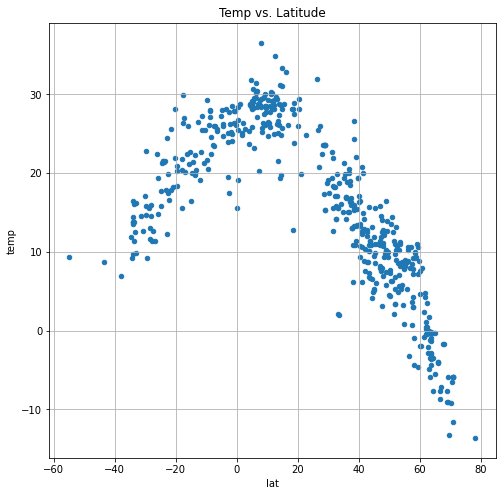

Compairing Temperature and Latitude


In [9]:
df.plot(kind="scatter", x="lat", y="temp", 
                  grid=True, figsize=(8,8), 
                  title="Temp vs. Latitude" )

plt.show()
print("Compairing Temperature and Latitude")


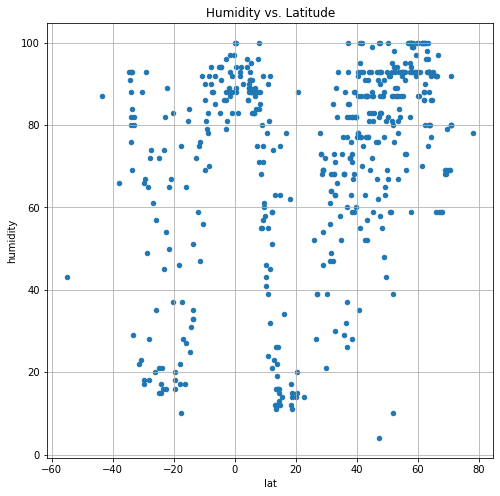

Compairing Humidity vs Latitude


In [10]:
df.plot(kind="scatter", x="lat", y="humidity", 
                  grid=True, figsize=(8,8), 
                  title="Humidity vs. Latitude")

plt.show()
print("Compairing Humidity vs Latitude")

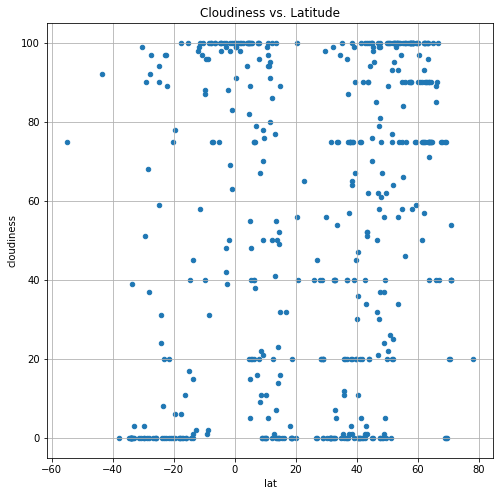

Compairing cloudiness and latitude


In [11]:
df.plot(kind="scatter", x="lat", y="cloudiness", 
                  grid=True, figsize=(8,8), 
                  title="Cloudiness vs. Latitude" )

plt.show()
print("Compairing cloudiness and latitude")

In [ ]:
df.plot(kind="scatter", x="lat", y="wind_speed", 
                  grid=True, figsize=(8,8), 
                  title="Windspeed vs. Latitude" )

plt.show()
print("Compairing Windspeed and Latitude")

In [ ]:
x_values = df['lat']
y_values = df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Latitude Southern Hemisphere')
plt.ylabel('Tempeture')
plt.show()

In [ ]:
x_values = df['lat']
y_values = df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
x_values = df['lat']
y_values = df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [ ]:
x_values = df['lat']
y_values = df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [ ]:
weather_data.csv